# Mathématiques - UE 11 - Projet numérique - Equations différentielles

# Modèle proie – prédateur

## Judith BELLON & Louis-Justin TALLOT

### Préambule

In [1]:
# Third-Party Libraries
# ---------------------

# Numpy
import numpy as np

# Matplotlib
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [7, 7] # [width, height] (inches). 

# Jupyter & IPython
from IPython.display import display

In [2]:
# Fonction utilitaire :

def display_contour(f, x, y, levels):
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    fig, ax = plt.subplots()
    contour_set = plt.contour(
        X, Y, Z, colors="grey", 
        linestyles="dashed", 
        levels=levels 
    )
    ax.clabel(contour_set)
    plt.grid(True)
    plt.xlabel("$x_1$") 
    plt.ylabel("$x_2$")
    plt.gca().set_aspect("equal")

## Modèle proie - prédateur    

**Les équations de Lotka-Volterra, ou "modèle proie-prédateur", sont couramment utilisées pour décrire la dynamique de systèmes biologiques dans lesquels un prédateur et sa proie interagissent dans un milieu commun. Elles ont été proposées indépendamment par A. J. Lotka en 1925 et V. Volterra en 1926 et s'écrivent de la manière suivante :** 

$$\begin{cases} \dot{x}_1 &=& x_1 \:(\alpha -\beta \, x_2) \\ \dot{x}_2 &=& -x_2\:(\gamma - \delta \, x_1) \end{cases}$$ 

**où $x_1$ et $x_2$ désignent le nombre (positif) de proies et de prédateurs respectivement et $\alpha$, $\beta$, $\gamma$, $\delta$ sont des paramètres strictement positifs.**

### Question 1
**Donner une interprétation physique à chaque terme de la dynamique.**

$\alpha$, $\beta$, $\gamma$, $\delta$ sont strictement positifs. Ainsi : 

* pour le nombre de proies $x_1$ : 
    * plus les proies sont nombreuses ($x_1$ augmente) plus celles-ci ce reproduisent et donc $\dot x_1 >0$ d'où le terme $\alpha \: x_1$
    * plus les prédateurs sont nombreux ($x_2$ augemente) et moins il y a de proies, qui sont chassées, d'où le terme $-\beta \: x_1\,x_2$
    
* pour le nombre de prédateurs $x_2$ :
    * plus il y a de prédateurs et plus ceux-ci se font concurrence pour l'accès à la nourriture (les proies), leur rythme de reproduction étant beaucoup plus lent que celui de leurs proies ; d'où le terme $-\gamma \: x_2$
    * enfin, si le nombre de proies augmente, un plus grand nombre de prédateurs peuvent vivre sur une plus grande ressource, d'où le terme $+\delta \: x_1 \, x_2$

**Montrer qu'il existe deux points d'équilibre $(0,0)$ et $\bar{x}\in \mathbb{R}^*_+\times\mathbb{R}^*_+$.**

Pour trouver les points d'équilibre, on résout le système suivant :

$$\begin{cases} 0 &=& x_1 \:(\alpha -\beta \, x_2) \\ 0 &=& -x_2\:(\gamma - \delta \, x_1) \end{cases}$$ 


On a dans la première équation $x_1 = 0$ ou $(\alpha-\beta\:x_2) = 0$.

* Supposons $x_1 = 0$. On a alors dans la deuxième équation $\gamma \: x_2 = 0$ et $\gamma>0$ d'où $x_2=0$. Ainsi $(0,0)$ est point d'équilibre du système.
* On suppose maintenant $(x_1, x_2) \neq (0,0)$. On a alors nécessairement $(\alpha -\beta \, x_2)=0$ et $(\gamma - \delta \, x_1) = 0$, d'où $(x_1, x_2) = \left(\dfrac{\gamma}{\delta},\,\dfrac{\alpha}{\beta}\right)$.




**Que peut-on dire de leur stabilité à ce stade ?**

On calcule la jacobienne du système : $ J = \begin{pmatrix} \alpha - \beta \: x_2 & -\beta\:x_1 \\ \delta\:x_2 & -\gamma + \delta\:x_1 \end{pmatrix}$ .

En $0$, cela donne $ J(0) = \begin{pmatrix} \alpha & 0 \\ 0 & -\gamma \end{pmatrix}$. Cette matrice a pour valeurs propres $\alpha > 0 $ et  $ -\gamma < 0 $, $0$ est donc un point d'équilibre instable.

En $\bar{x}$, cela donne $ J(\bar{x}) = \begin{pmatrix} 0 & -\frac{\beta\gamma}{\delta} \\ \frac{\delta\alpha}{\beta} & 0 \end{pmatrix}$. Cette matrice a pour valeurs propres $\pm i \sqrt{\alpha\gamma}$, de partie réelle nulle, on ne peut donc rien dire sur la stabilité de $\bar{x}$ .

### Question 2
**A l'aide des fonctions ``meshgrid`` et ``quiver``, visualiser graphiquement le champ de vecteurs. Intuiter le comportement des solutions. On pourra aussi utiliser `streamplot` pour visualiser le portrait de phase.**

In [3]:
alpha = 2/3
beta = 4/3
gamma = 1
delta = 1

In [4]:
def derivees_LV(x1, x2):
    return x1*(alpha - beta*x2), -x2*(gamma - delta*x1)


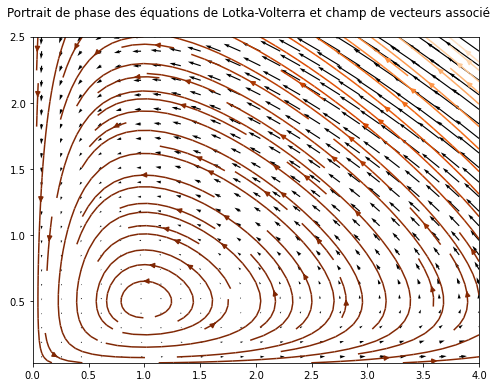

In [5]:
plt.rcParams['figure.figsize'] = [8, 6]

# champ de vecteurs
N = 25
x = np.linspace(2/N,4,N-2)
y = np.linspace(2/N,2.5,N-2)
X, Y = np.meshgrid(x,y)
d_LV = np.vectorize(derivees_LV)
plt.quiver(X, Y, X*(alpha - beta*Y), -Y*(gamma - delta*X), linewidth=0.05)

# portrait de phase
N = 57
x = np.linspace(2/N,4,N-2)
y = np.linspace(2/N,2.5,N-2)
X, Y = np.meshgrid(x,y)
plt.streamplot(X, Y, X*(alpha - beta*Y), -Y*(gamma - delta*X), color = -((X*(alpha-beta*Y))**2 + (-Y*(gamma - delta*X))**2), cmap="Oranges")
plt.xlim(left=0)
plt.suptitle("Portrait de phase des équations de Lotka-Volterra et champ de vecteurs associé", y=0.95)
plt.rcParams['figure.figsize'] = [7, 7]

A priori, les solutions vont suivre le champ de vecteurs, et donc suivre un cycle
* augmentation du nombre de proies à nombre de prédateurs assez faible 
* augmentation du nombre de prédateurs et diminution du nombre de proies
* diminution du nombre de prédateurs à nombre de proies assez faible

Et ainsi de suite. 

(Le cycle peut bien entendu commencer n'importe où en fonction des conditions initiales)

### Question 3
**Par le théorème de Cauchy-Lipschitz, démontrer que toute solution initialisée dans $\mathbb{R}^*_+\times\mathbb{R}^*_+$ reste dans $\mathbb{R}^*_+\times\mathbb{R}^*_+$ sur son ensemble de définition.**

La jacobienne calculée en 1) étant continue, on peut appliquer le théorème de Cauchy-Lipschitz qui assure l'existance et l'unicité des solutions maximales pour toute condition initiale.

Si $x_1(0) = 0$, alors $\dot{x_1}(0) = 0$.

Une solution possible est alors que $x_1$ reste nul, et que $x_2(t) = x_2(0) \exp{(-\gamma\,t)}$. Par unicité c'est alors la seule solution. Ainsi, si $x_1$ est nul à un moment, il l'est partout. La situation est similaire pour $x_2$.

Ainsi, si une solution est initialisée dans $\mathbb{R}^*_+\times\mathbb{R}^*_+$, elle y reste sur son ensemble de définition puisqu'elle ne peut pas croiser une autre solution.

### Question 4
On considère la fonction $ H(x_1,x_2) = \delta \: x_1 - \gamma \ln x_1 + \beta \: x_2 - \alpha \ln x_2$ définie sur $\mathbb{R}^*_+\times\mathbb{R}^*_+$. 

**Calculer la dérivée de $H$ le long des solutions initialisées dans $\mathbb{R}^*_+\times\mathbb{R}^*_+$.**

On a :
$\dot{H} = \delta \: \dot{x_1} - \gamma \frac{\dot{x_1}}{x_1} + \beta \: \dot{x_2} - \alpha \frac{\dot{x_2}}{x_2}  $

Or, le long d'une solution on a $\dot{x}_1 = x_1 \:(\alpha -\beta \, x_2) $ et $ \dot{x}_2 = -x_2\:(\gamma - \delta \, x_1)$, d'où
$\dot{H} = \delta \: x_1(\alpha - \beta \, x_2) - \gamma \:(\alpha - \beta \, x_2) - \beta \: x_2\:(\gamma - \delta \, x_1) + \alpha \: (\gamma - \delta \, x_1) $

Ce qui donne $\dot{H} = 0$ le long des solutions.


**En déduire que toute solution maximale initialisée dans $\mathbb{R}^*_+\times\mathbb{R}^*_+$ est définie sur $\mathbb{R}$.**

Soit $x$ une solution maximale initialisée dans $\mathbb{R}^*_+\times\mathbb{R}^*_+$.

Si elle n'est pas définie sur $\mathbb{R}$ tout entier, alors elle explose en temps fini, i.e il existe $t_m \in \mathbb{R}$ tel que $\|x\|$ tende vers l'infini en $t_m$. 
Or $\lim_{\|x\| \to +\infty} H(x) = +\infty$, donc on a alors $\lim_{t \to t_m} H(x(t)) = +\infty$, ce qui est exclu puisque H est constante le long d'une solution.

 Donc $x$ est définie sur $\mathbb{R}$.

### Question 5
**Représenter les courbes de niveau de $H$.  Où se trouve $\bar{x}$ ? Qu’en conclut-on sur le comportement des solutions ? En déduire (graphiquement) que $\bar{x}$ est stable, au sens de la définition de stabilité.**

In [6]:
def H(x1,x2):
    return delta * x1 - gamma * np.log(x1) + beta * x2 - alpha * np.log(x2)

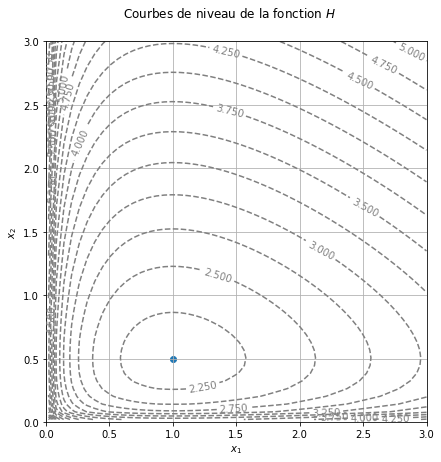

In [7]:
plt.rcParams['figure.figsize'] = [8,7]
N = 50
t = np.linspace(1/N, 3, N)
display_contour(H,t, t, 20)
plt.scatter(gamma/delta, alpha/beta, marker='o')
plt.suptitle("Courbes de niveau de la fonction $H$", y=0.95)
plt.ylim(bottom=0, top=3)
plt.xlim(left=0, right=3);

plt.rcParams['figure.figsize'] = [7, 7]

Comme $H$ est constant le long d'une trajectoire, les solutions suivent les courbes de niveau de $H$. Comme prévu, ces solutions "tournent" et forment des trajectoires fermées : au bout d'un certain temps, on revient à la situation initiale. Les solutions sont donc périodiques.

$\bar{x}$ se trouve au centre de ces trajectoires. 

On peut alors en déduire que $\bar{x}$ est stable car si l'on initialise une solution proche de $\bar{x}$, elle va "tourner autour" de $\bar{x}$ sans trop s'en éloigner : en initialisant assez proche de $\bar{x}$ on peut en rester arbitrairement proche.

**On souhaite maintenant simuler numériquement les trajectoires.**

### Question 6

**Coder une fonction du type**
```python
def solve_euler_explicit(f, x0, dt, t0, tf):
     ...
    return t, x
```
**prenant en entrée :**
- **une fonction `f`$:\mathbb{R} \times \mathbb{R}^n \to \mathbb{R}^n$ quelconque**
- **une condition initiale `x0`**
- **un pas de temps `dt`**
- **les temps initiaux et finaux `t0` et `tf`**

**et renvoyant le vecteur des temps $t^j$ et de la solution $x^j$ du schéma d'Euler explicite appliqué à $\dot{x}=f(t,x)$.**

In [8]:
def solve_euler_explicit(f, x0, dt, t0, tf):
    t = np.arange(t0,tf+dt,dt)
    x = [x0]
    for date in t[1:]:
        x.append(x[-1] + dt * f(date, x[-1]))
                 
    return t, np.array(x)

**La tester sur une équation différentielle aux solutions exactes connues.**

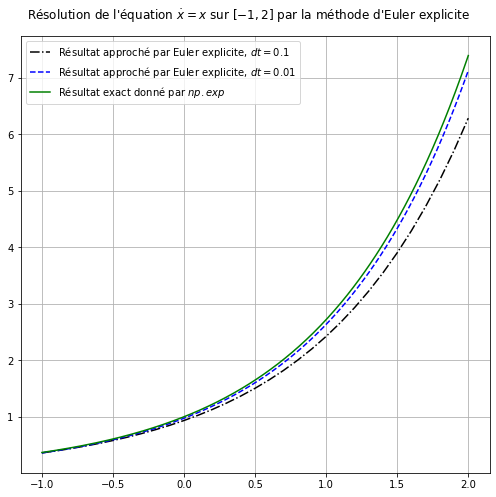

In [9]:
plt.figure()
t,x = solve_euler_explicit(lambda t,x:x, 0.36, 0.1,-1, 2)
plt.plot(t,x, label="Résultat approché par Euler explicite, $dt=0.1$", linestyle='dashdot', color="black")
t,x = solve_euler_explicit(lambda t,x:x, 0.36, 0.01,-1, 2)
plt.plot(t,x, label="Résultat approché par Euler explicite, $dt=0.01$", linestyle='dashed', color = 'b')
plt.plot(t,np.exp(t), label=r"Résultat exact donné par $np.exp$", color="green")
plt.grid()
plt.suptitle("Résolution de l'équation $\dot x=x$ sur $[-1,2]$ par la méthode d'Euler explicite", y=0.98)
plt.tight_layout()
plt.legend();

**Vérifier la convergence du schéma lorsque $dt$ tend vers 0.**

In [10]:
#Maths à la main : 


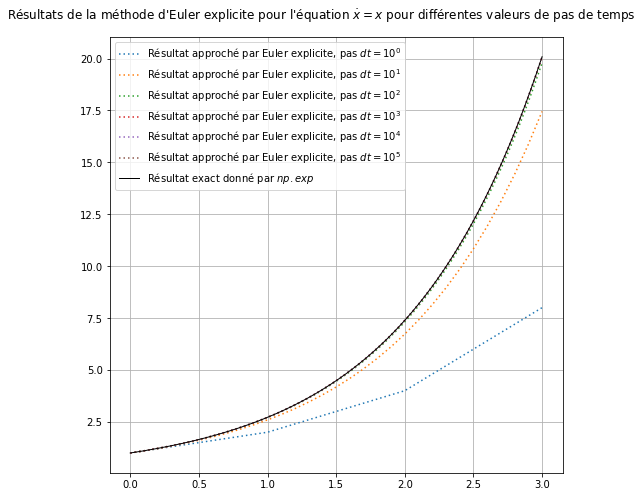

In [11]:
# Visualisation graphique :


linestyle_tuple = [(0, (1, 1)),
                   (0, (5, 7)),
                   (0, (5, 5)),
                   (0, (3, 7, 1, 7)),
                   (0, (3, 5, 1, 5)),
                   (0, (3, 5, 1, 5, 1, 5)),
                   (0, (3, 10, 1, 10, 1, 10))]


plt.figure()
plt.rcParams['figure.figsize'] = [9.5, 6.5]
for i in range(6):
    t,x = solve_euler_explicit(lambda t,x:x, 1, 10**(-i),0, 3)

    plt.plot(t,x, label = f"Résultat approché par Euler explicite, pas $dt=10^{i}$", linestyle = (0, (1, 2)))
    
plt.plot(t,np.exp(t), label=r"Résultat exact donné par $np.exp$", color='black', linewidth=1)
plt.legend()
plt.grid();
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.suptitle("Résultats de la méthode d'Euler explicite pour l'équation $\dot x = x$ pour différentes valeurs de pas de temps", y=0.98 );

**Comment visualiser graphiquement l'ordre de convergence ?**

Par définition, s’il existe $p \in \mathbb{N^*}$ et $c_v > 0 $ tels que $\max\limits_{1≤j≤J} ‖x_j−x(t_j)‖ ≤ c_v(∆t)^p $ pour tout $\Delta t$, on dit que le schéma est convergent à l’ordre $p$. En passant au logarithme (qui est strictement croissant), cela revient à $ \log(\max_{1≤j≤J} ‖x_j−x(t_j)‖) ≤ \log(c_v) + p \log(∆t) $.

Si l'on trace $\log(\max_{1≤j≤J} ‖x_j−x(t_j)‖)$ en fonction de $\log(∆t)$, la pente donne alors l'ordre de convergence.


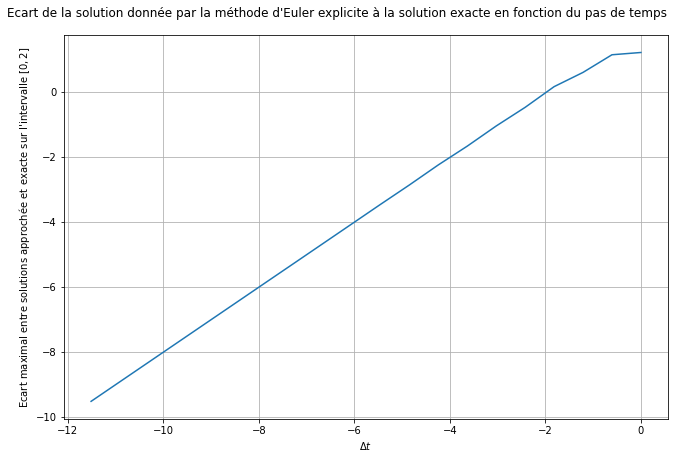

In [12]:
plt.figure()
delta_t = np.power(10, -np.linspace(0,5,20))
liste_max = []
for dt in delta_t:
    t,x = solve_euler_explicit(lambda t,x:x, 1, dt,0, 2)
    liste_max.append(max(abs(x-np.exp(t))))
    
   
plt.plot(np.log(delta_t), np.log(np.array(liste_max)));

plt.suptitle("Ecart de la solution donnée par la méthode d'Euler explicite à la solution exacte en fonction du pas de temps", y=0.98)
plt.tight_layout()
plt.subplots_adjust(top=0.92, bottom=0.1, left = 0.1)

plt.xlabel("$\Delta t$")
plt.ylabel("Ecart maximal entre solutions approchée et exacte sur l'intervalle $[0,2]$")
plt.grid();

On obtient une pente de 1, ce qui permet de visualiser l'ordre 1 du schéma d'Euler.

### Question 7
**Utiliser le schéma d'Euler explicite pour simuler les équations de Lotka-Volterra.**

In [13]:
def f_LV(x):
    x1 = x[0]
    x2 = x[1]
    return np.array([x1*(alpha - beta*x2), -x2*(gamma - delta*x1)])

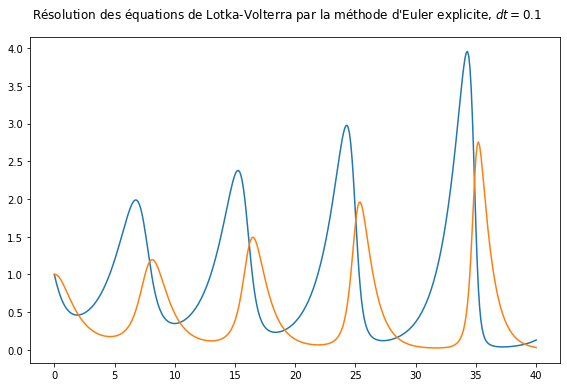

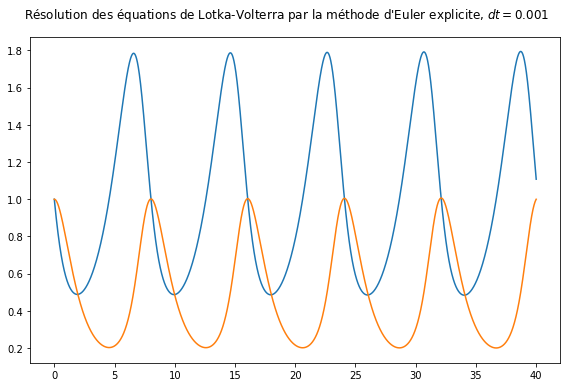

In [14]:
plt.rcParams['figure.figsize'] = [9.5, 6]
plt.figure()
t, x = solve_euler_explicit(lambda t,x:f_LV(x), np.array([1,1]), 0.1,0, 40)
plt.plot(t,x) 
plt.suptitle("Résolution des équations de Lotka-Volterra par la méthode d'Euler explicite, $dt=0.1$", y=0.95)
plt.figure()
t, x = solve_euler_explicit(lambda t,x:f_LV(x), np.array([1,1]), 0.001,0, 40)
plt.plot(t,x)
plt.suptitle("Résolution des équations de Lotka-Volterra par la méthode d'Euler explicite, $dt=0.001$", y=0.95)

plt.rcParams['figure.figsize'] = [7, 7]                                                
                            

**Que constate-t-on en temps long ?**

Au temps long nous observons une dérive de l'évolution ; les maxima atteints sont de plus en plus élevés. Cela se voit particulièrement quand $dt$, le pas de la méthode d'Euler, est élevé.

**Cette résolution vous semble-t-elle fidèle à la réalité ? On pourra tracer l'évolution de la fonction $H$.**

In [15]:
def H_vect(x):
    x1 = x[:,0]
    x2 = x[:,1]
    return delta * x1 - gamma * np.log(x1) + beta * x2 - alpha * np.log(x2)

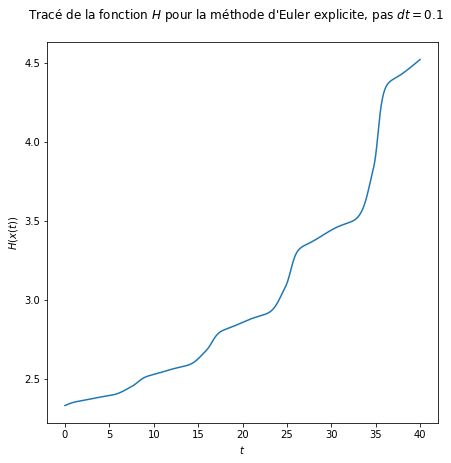

In [16]:
# On trace la fonction H

t, x = solve_euler_explicit(lambda t,x:f_LV(x), np.array([1,1]), 0.1,0, 40)

plt.figure()
plt.suptitle("Tracé de la fonction $H$ pour la méthode d'Euler explicite, pas $dt=0.1$", y=0.95)
plt.xlabel("$t$")
plt.ylabel("$H(x(t))$")
plt.plot(t, H_vect(x));

On voit que $H$ dérive progressivement, alors qu'elle devrait être constante au cours de l'évolution. Cette résolution ne correspond donc pas à la réalité.

### Question 8
**Coder maintenant une fonction du type**
```python
def solve_euler_implicit(f, x0, dt, t0, tf, itermax = 100):
    ...
    return t, x
```
**donnant la solution d'un schéma d'Euler implicite appliqué à $\dot{x}=f(t,x)$ selon la méthode présentée dans le cours.**

In [17]:
def point_fixe_de_Banach(f, x0, eps=1e-10):
    x = x0
    while(np.linalg.norm(f(x)-x)>eps):
        x = f(x)
    return x

In [18]:
def solve_euler_implicit(f, x0, dt, t0, tf):
    
    t = np.arange(t0,tf+dt,dt) # soumis au erreurs d'arrondis mais tant pis
    x = [x0]
    
    for date in t[1:]:
        # on applique le théorème du point fixe de Banach 
        x.append(point_fixe_de_Banach(lambda y: (x[-1] + dt * f(date, y)), x[-1]))            
                 
    return t, np.array(x)

**Vérifier de nouveau sa convergence sur des solutions connues.**

**Que se passe-t-il cette fois-ci sur les équations de Lotka-Volterra ?**

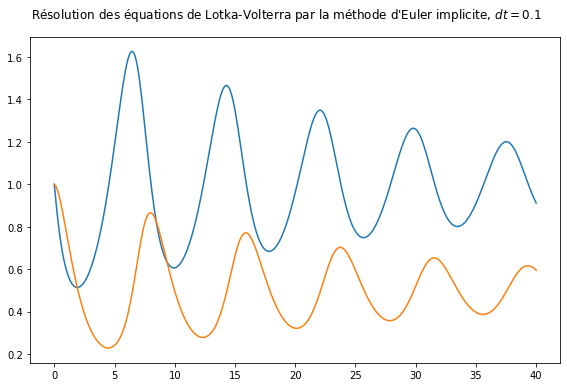

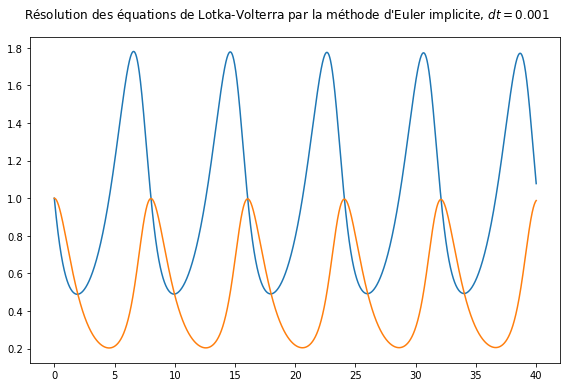

In [19]:
plt.rcParams['figure.figsize'] = [9.5, 6]
t, x = solve_euler_implicit(lambda t,x:f_LV(x), np.array([1,1]), 0.1,0, 40)
plt.figure()
plt.suptitle("Résolution des équations de Lotka-Volterra par la méthode d'Euler implicite, $dt=0.1$", y=0.95)
plt.plot(t,x);

t, x = solve_euler_implicit(lambda t,x:f_LV(x), np.array([1,1]), 0.001,0, 40)
plt.figure()
plt.suptitle("Résolution des équations de Lotka-Volterra par la méthode d'Euler implicite, $dt=0.001$", y=0.95)
plt.plot(t,x);
plt.rcParams['figure.figsize'] = [7, 7]

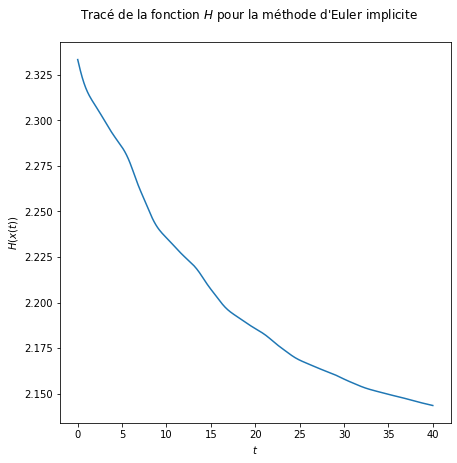

In [20]:
# On trace la fonction H

t, x = solve_euler_implicit(lambda t,x:f_LV(x), np.array([1,1]), 0.1,0, 40)

plt.figure()
plt.suptitle("Tracé de la fonction $H$ pour la méthode d'Euler implicite", y=0.95)
plt.plot(t, H_vect(x))
plt.xlabel("$t$")
plt.ylabel("$H(x(t))$");

Nous observons pour la méthode d'Euler implcite une diminution progressive de l'ampleur des solutions, comme si un amortissement avait été introduit dans le système. Cette analyse est confirmée par le tracé de la fonction $H$, qui diminue au fur et à mesure de l'évolution temporelle.

Ainsi, aucune des deux méthodes d'Euler, implicite comme explicite, ne parvient à résoudre de manière satisfaisante les équations de Lotka-Volterra.

$\qquad$                                                     

**On propose maintenant de modifier ces schémas de façon à stabiliser $H$ et assurer sa conservation le long des solutions numériques.**

### Question 9
**Expliquer pourquoi les solutions de $\begin{cases} \dot{x}_1 &=& \: \, \: x_1 \: (\alpha -\beta \: x_2) - u_1(x_1,x_2)\cdot(H(x_1,x_2)-H_0) \\ \dot{x}_2 &=& - x_2 \:(\gamma - \delta \:x_1) - u_2(x_1,x_2)\cdot (H(x_1,x_2)-H_0) \end{cases} $**

**sont identiques à celles de Lotka-Volterra si $H_0 = H(x(0))$ pour tout choix de $u:\mathbb{R}^2 \to \mathbb{R}^2$.**

Notons $(*)$ ce nouveau système.

Soit $x = (x_1, x_2)$ une solution de Lotka-Volterra. Si $H_0 = H(x(0))$, comme H est constante sur cette solution on a $H(x_1,x_2) - H_0 = 0$ pour tout t.
x est alors ausi solution de $(*)$ puisque dans ces conditions, il se résume aux équations de Lotka-Volterra pour tout $u:\mathbb{R}^2 \to \mathbb{R}^2$.

On a donc trouvé une solution à $(*)$ pour toute condition initiale telle que  $H_0 = H(x(0))$, par unicité des solutions maximales (théorème de Cauchy-Lipschitz), on les a toutes.

Donc les solutions de $(*)$ sont identiques à celles de Lotka-Volterra si $H_0 = H(x(0))$ pour tout choix de $u:\mathbb{R}^2 \to \mathbb{R}^2$.

### Question 10
**Soit $H_0\in \mathbb{R}$. Calculer la dérivée de $H-H_0$ le long des solutions de ce nouveau système. Montrer que l'on peut choisir $u$ tel que $$ \frac{d }{dt} (H(x(t))-H_0) = -k || \nabla H(x(t)) ||^2 (H(x(t))-H_0) \ . $$**

On calcule $\nabla H(x(t))$ :

$|| \nabla H(x(t)) ||^2 = \left(\delta -  \dfrac{\gamma}{x_1}\right)^2 + \left(\beta - \dfrac{\alpha}{x_2}\right)^2$


On a : $\dfrac{d }{dt} (H(x(t))-H_0) = \delta \dot x_1 - \gamma \dfrac{\dot x_1}{x_1} + \beta \dot x_2 - \alpha \dfrac{\dot x_2}{x_2}$

et donc le long des solutions de ce nouveau système, on a alors :

$$\begin{align} \dfrac{d }{dt} (H(x(t))-H_0) &= \left(\delta - \dfrac{\gamma}{x_1}\right)(x_1(\alpha - \beta x_2) - u_1(x_1,x_2)(H(x_1,x_2)-H_0)) + \left(\beta - \dfrac{\alpha}{x_2}\right)(-x_2(\gamma-\delta x_1)-u_2(x_1,x_2)(H(x_1,x_2)-H_0))
\end{align}
$$

On veut de plus : $\dfrac{d }{dt} (H(x(t))-H_0) = -k || \nabla H(x(t)) ||^2 (H(x(t))-H_0)$ en posant une fonction $u$ adaptée.

On veut donc : 
$$\begin{cases}
\, \, \;  x_1(\alpha - \beta x_2) - u_1(x_1,x_2)(H(x_1,x_2)-H_0)&=-k\left(\delta - \dfrac{\gamma}{x_1}\right)(H(x_1,x_2)-H_0)\\
-x_2(\gamma - \delta x_1)-u_2(x_1,x_2)(H(x_1,x_2)-H_0)&=-k\left(\beta - \dfrac{\alpha}{x_2}\right)(H(x_1,x_2)-H_0)
\end{cases}
$$

et donc on pose $u$ telle que pour tout $x$ :

$$\begin{cases}
u_1(x)&=&k\left(\delta - \dfrac{\gamma}{x_1}\right)+\dfrac{x_1(\alpha - \beta x_2)}{H(x_1,x_2)-H_0}\\
u_2(x)&=&k\left(\beta - \dfrac{\alpha}{x_2}\right)-\dfrac{x_2(\gamma-\delta x_1)}{H(x_1,x_2)-H_0}
\end{cases}
$$

**En déduire qu'alors $H(x(t))$ converge exponentiellement vers $H_0$ quand $t$ tend vers l'infini si $x$ reste à une distance $\epsilon>0$ de $\bar{x}$.**

Si $x$ reste à une distance strictement positive de $\bar{x}$, alors il existe $\epsilon > 0$ tel que $|| \nabla H(x(t)) ||^2 > \epsilon$ pour tout $t$.

Alors $\dfrac{d }{dt} (H(x(t))-H_0) < -k \,\epsilon\, (H(x(t))-H_0)$

d'où $ H(x(t)) - H_0 < \exp{(-k \,\epsilon\, t)}$

*i.e* $H(x(t))$ converge exponentiellement vers $H_0$ quand $t$ tend vers l'infini.

### Question 11
**En déduire comment modifier l'implémentation du schéma d'Euler pour assurer la stabilité de $H$.**

Nous devons donc intégrer la fonction $u$ précédemment déterminée au système de départ pour obtenir le système $(*)$. Cela va donc permettre d'assurer la stabilité de $H$ et donc de la bonne qualité des solutions.

In [21]:
def solve_euler_explicit(f, x0, dt, t0, tf):
    t = np.arange(t0,tf+dt,dt)
    x = [x0]
    for date in t[1:]:
        x.append(x[-1] + dt * f(date, x[-1]))
                 
    return t, np.array(x)

In [22]:
def f_LV_stabilisees(x, H0,k):
    x1 = x[0]
    x2 = x[1]

    #print("===========")

    #print(f"x1: {x1}, x2: {x2}")

    if x1 < 1e-15 or x2 < 1e-15:

        return np.array([x1*(alpha - beta*x2), -x2*(gamma - delta*x1)])
    deltaH = H(x1,x2) - H0
    #print(f"dH {deltaH}")
    if abs(deltaH)<1e-15 or np.isnan(deltaH):
        return np.array([x1*(alpha - beta*x2), -x2*(gamma - delta*x1)])
    
    #res =  np.array([x1*(alpha - beta*x2)+k*(delta -gamma/x1)*deltaH+x1*(alpha - beta*x2),
    #                -x2*(gamma - delta*x1)+k*(beta - alpha/x2)*deltaH-x2*(gamma-delta*x1)])
    res = np.array([-k*(delta-gamma/x1)*deltaH, -k*(beta-alpha/x2)*deltaH])
    #print("res ", res)
    return res

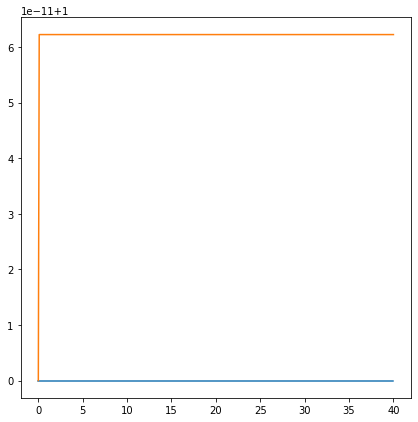

In [23]:
k=10
plt.figure()

x10, x20 = 1, 1
t, x = solve_euler_implicit(lambda t,x:f_LV_stabilisees(x,H(x10, x20),k), np.array([x10, x20]), 0.1,0, 40)
plt.plot(t,x);

**Quel est le rôle de $k$ ? Peut-il être choisi arbitrairement grand ? Pourquoi ?**

La constante $k$ va nous donner la vitesse de convergence de $H$ vers $H_0$. On souhaiterait donc la choisir la plus grande possible, afin de s'assurer de la stabilité de la méthode. Néanmoins, les erreurs d'arrondi d'une part, et d'autre part le fait que nous travaillons sur des pas de temps discrets $dt$ va limiter l'intérêt d'une valeur de $k$ très grande. La méthode est stable au bout de quelques pas de temps, du fait de la décroissance exponentielle de "l'erreur" représentée par $H(x(t))-H_0$.